<a href="https://colab.research.google.com/github/anjha1/Data-Science/blob/main/Python/198.%20K%20Means%20Clustering%20Implementation/K_Means_Clusterin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K Means Clustering Algorithms Implementation**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

[link of make_blobs](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_blobs.html)

In [2]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=23)

In [3]:
X.shape

(1000, 2)

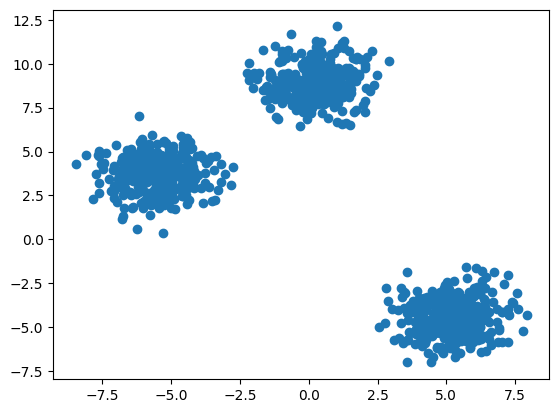

In [4]:
plt.scatter(X[:,0],X[:,1])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

[link KMeans](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html)

In [5]:
from sklearn.cluster import KMeans

1.   **Manual Process**
2.   **Elbow Method**


### Elbow Method to select the K value

In [9]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

In [10]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1181.5125601112823,
 1049.7741057058506,
 908.9970983421999,
 827.3966048984802,
 707.9534391125667,
 582.849454655273,
 533.3015329641177]

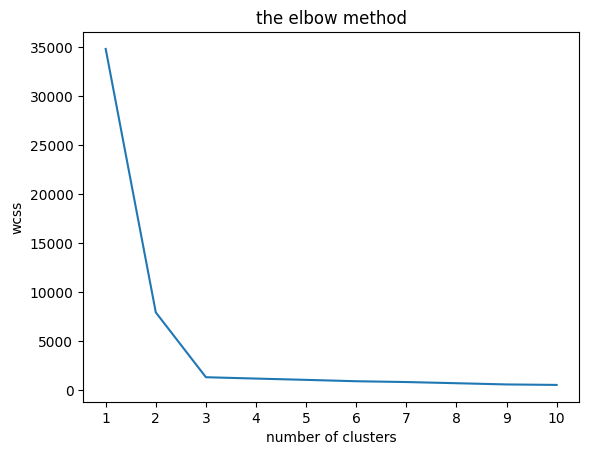

In [11]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [13]:
y_lables=kmeans.fit_predict(X_train)

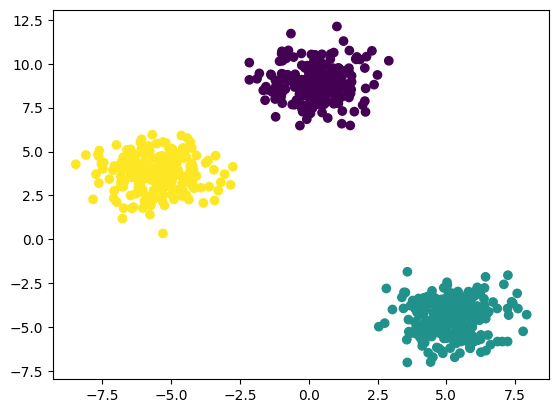

In [14]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lables)

In [15]:
y_test_labels=kmeans.predict(X_test)

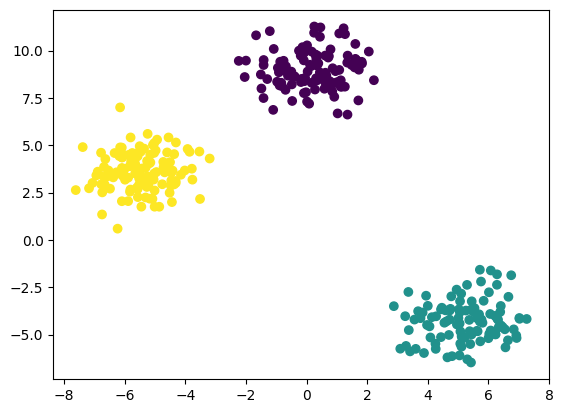

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

# **knee Locater**

In [17]:
!pip install kneed

In [18]:
from kneed import KneeLocator

In [19]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

**Performance metrics**

**Silhoutte score**

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
silhouette_coeff=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  score=silhouette_score(X_train,kmeans.labels_)
  silhouette_coeff.append(score)

In [22]:
silhouette_coeff

[0.7281443868598331,
 0.8071181203797672,
 0.6563126045005122,
 0.48919843890372644,
 0.33375395376128414,
 0.3335838009539924,
 0.3307890556449937,
 0.3390552355452686,
 0.33341695602372823]

**plotting silhouette score**

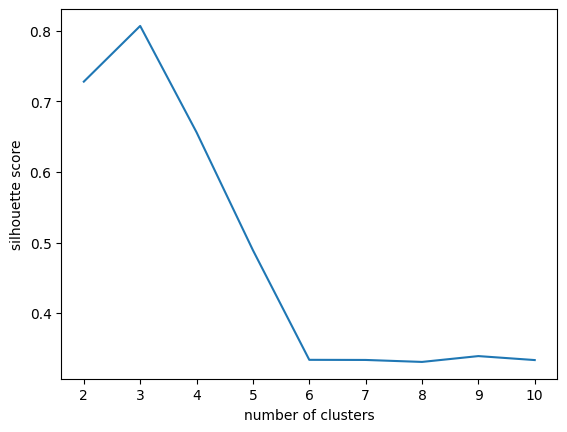

In [23]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()